In [1]:
## importing functions
from __future__ import division, print_function
import sys
sys.path.append('/home/damingshen/Code_sub_Rad_AI/')
import CNN_rCS_4L
import Load_slice_6RespState_batch
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import tensorflow as tf
import tensorflow as tf
import os
plt.rcParams['image.cmap'] = 'gray'

In [2]:
## Specifying GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

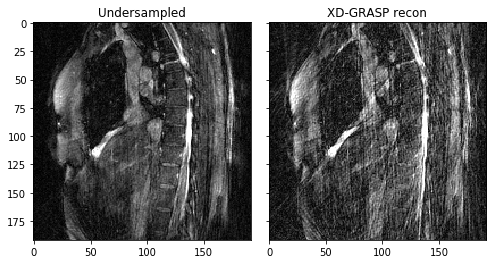

In [3]:
#Loading in training data using data provider
#Location of undersampled slice + time data sets for training
search_path_zp = "/home/damingshen/Hassan/MRM_submission_2/NewSENSEData/Data/2DSpaceTime/ZeroFilled/"
#Location of XD-GRASP reconstructed slice + time data sets for training
search_path_rc = "/home/damingshen/Hassan/MRM_submission_2/NewSENSEData/Data/2DSpaceTime/CSrecon/"
#Each _zp.mat file contains the zero-filled (i.e. undersampled) images for a single slice + associated 6 respiratory time frames for a given training patient 
#Each _rc.mat file contains the XD-GRASP (i.e. recostructed) a images for single slice + associated 6 respiratory time frames for a given training patient 

data_images = Load_slice_6RespState_batch.Slice_Provider(search_path_zp,search_path_rc,
                                          zp_suffix="_zp.mat",rc_suffix="_rc.mat", scale_factor = 1,batch_size = 4)
inpt=data_images.data[0]
outpt=data_images.data[1]
fig, ax = plt.subplots(1,2, sharex=True, sharey=True, figsize=(7,4))
ax[0].imshow(inpt[0,:,:,1,0], vmin=0,vmax=0.25)
ax[1].imshow(outpt[0,:,:,1,0], vmin=0,vmax=0.25)
ax[0].set_title("Undersampled")
ax[1].set_title("XD-GRASP recon")
fig.tight_layout()
plt.show()


In [4]:
# initializing network + optimizer
number_of_channels = 16
CNN_filter_space = 3
CNN_filter_time = 3
type_train_value = 'Training'
scale_factor = 1
batch=12
learning_rate_use = 0.005
decay_rate_use = 0.9

CNN_rCS_f16_L4 = CNN_rCS_4L.Sequential_network(depth = number_of_channels, 
                                               filter_size_space=CNN_filter_space, 
                                               fliter_size_time = CNN_filter_time, 
                                               type_train = type_train_value)

trainer = CNN_rCS_4L.Trainer(search_path_zp,search_path_rc,scale_factor, 
                             batch,CNN_rCS_f16_L4, optimizer='ADAM',
                             opt_kwargs=dict(learning_rate=learning_rate_use,decay_rate = decay_rate_use))


2019-05-03 08:57:39,167 Layers 4, depth 16, spatial filter size 3x3, temporal filter size: 3


Instructions for updating:
Colocations handled automatically by placer.


2019-05-03 08:57:39,187 From /home/damingshen/.local/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2019-05-03 08:57:39,222 From /home/damingshen/Code_sub_Rad_AI/CNN_rCS_4L.py:67: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [5]:
# model path 
path_model = "/home/damingshen/Code_sub_Rad_AI/Model_keep/f16_L4_v2/"
# training network 
path_f16_L4 = trainer.train(path_model, training_iters=100, epochs=30, display_it=10, dropout=1.0)

Instructions for updating:
Use tf.cast instead.


2019-05-03 08:57:45,063 From /home/damingshen/.local/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
2019-05-03 08:57:45,607 Start Optimizatin


KeyboardInterrupt: 